In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# 1. Business Understanding
# The goal is to predict customer churn for a bank
# We're trying to help a bank predict which customers might leave (churn). 
# This is important because keeping customers is cheaper than finding new ones.

In [3]:
# 2. Data Understanding
# We have a dataset with 10,000 customer records. Each record has 14 pieces of information about the customer, 
# like their credit score, age, and account balance. About 20% of customers in our data have left the bank.
# Load the data
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [6]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [7]:
#missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [11]:
print("Available columns:")
print(df.columns)

Available columns:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [12]:
# 3. Data Preparation and Exploratory Data Analysis
# We looked at how different factors relate to customers leaving.
# Older customers and those with higher account balances are more likely to leave.
# Customers from Germany churn more often than those from France or Spain.
# Having more products with the bank seems to keep customers around longer.

# We removed some columns that weren't useful for prediction.
# We turned text information (like country names) into numbers the computer can understand better.
# We split our data into two parts: one for training our model and one for testing it.
    
# Remove irrelevant columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

In [13]:
#Catergorical Variables instering
df = pd.get_dummies(df, drop_first=True)

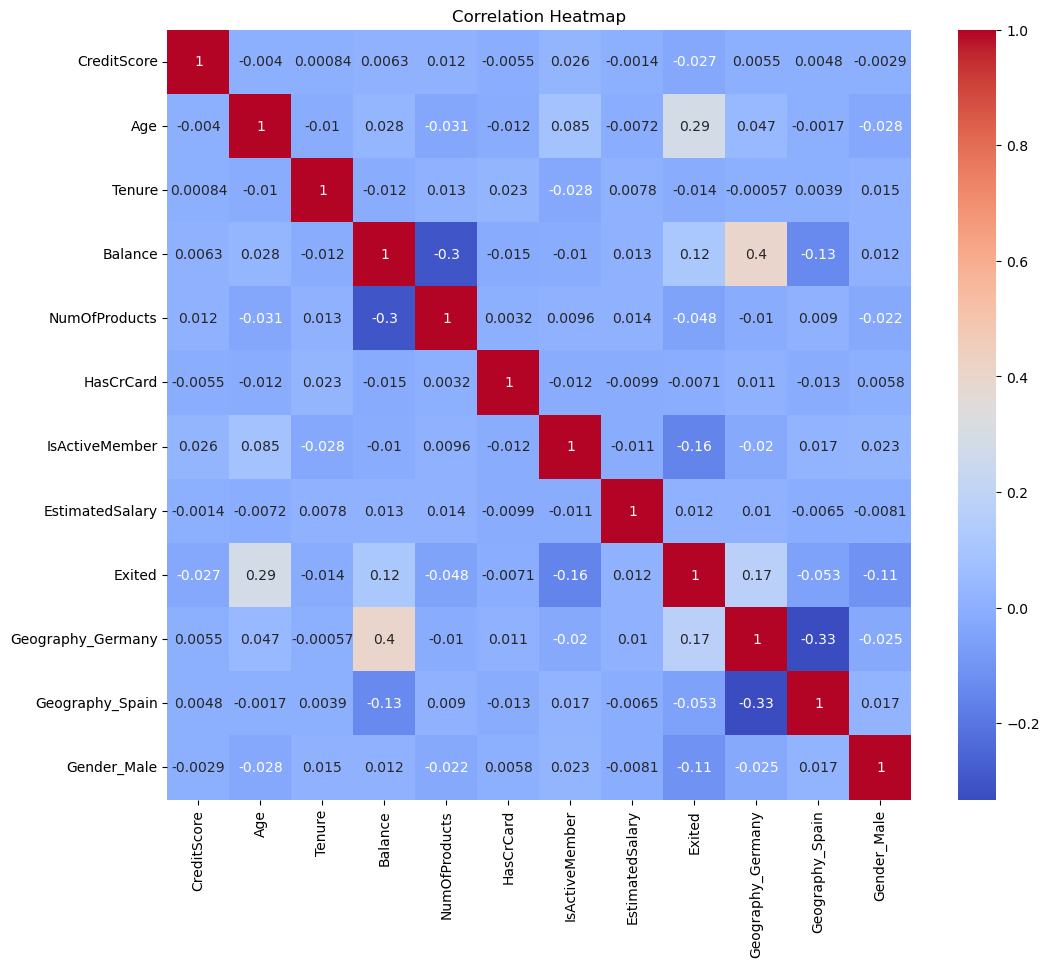

In [14]:
# Correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

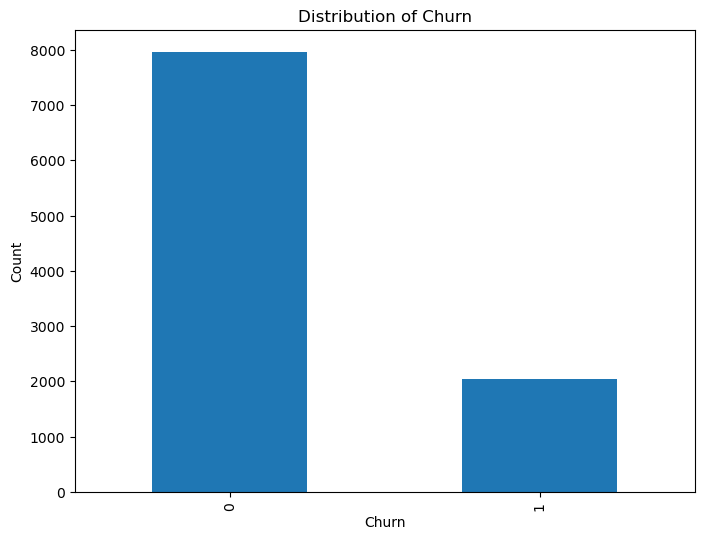

In [15]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
df['Exited'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# 4. Modeling
# We tried two different types of models:
#Logistic Regression: A simple model that's easy to understand.
# Random Forest: A more complex model that can catch tricky patterns.

In [19]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [20]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [21]:
# 5. Evaluation
# Both models did pretty well, correctly predicting about 86% of the time whether a customer would leave or stay.
# The Random Forest model was slightly better, especially at identifying customers who were likely to leave.
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Results:
Accuracy: 0.811

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [22]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Results:
Accuracy: 0.8665

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



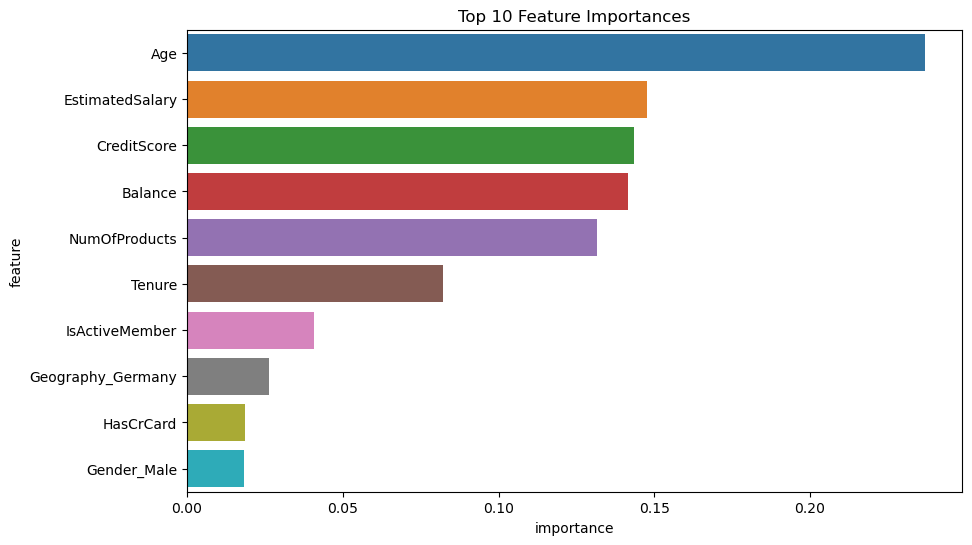

In [23]:
# Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()